# Machine Learning Mini Project 

## Data Loading and preprocessing 

In [2]:
import pandas as pd
data = pd.read_fwf("/servo/servo.data")

In [3]:
data.head()

,"E,E,5,4,",0.28125095
0,"B,D,6,5,",0.506252
1,"D,D,4,3,",0.356251
2,"B,A,3,2,",5.500033
3,"D,B,6,5,",0.356251
4,"E,C,4,3,",0.806255


In [4]:
column_name =['motor', 'screw', 'pgain', 'vgain','class']
data1 = pd.read_csv("/servo/servo.data", sep=',',names=column_name, header=None)

In [5]:
data1.head()

,motor,screw,pgain,vgain,class
0,E,E,5,4,0.281251
1,B,D,6,5,0.506252
2,D,D,4,3,0.356251
3,B,A,3,2,5.500033
4,D,B,6,5,0.356251


In [6]:
data1.shape

(167, 5)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   motor   167 non-null    object 
 1   screw   167 non-null    object 
 2   pgain   167 non-null    int64  
 3   vgain   167 non-null    int64  
 4   class   167 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.7+ KB


In [8]:
data1.isna().sum()

motor    0
screw    0
pgain    0
vgain    0
class    0
dtype: int64

In [9]:

from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder=LabelEncoder()

In [11]:
data1['motor']=label_encoder.fit_transform(data1['motor'])
data1['screw']=label_encoder.fit_transform(data1['screw'])
data1

,motor,screw,pgain,vgain,class
0,4,4,5,4,0.281251
1,1,3,6,5,0.506252
2,3,3,4,3,0.356251
3,1,0,3,2,5.500033
4,3,1,6,5,0.356251
...,...,...,...,...,...
162,1,2,3,2,4.499986
163,1,4,3,1,3.699967
164,2,3,4,3,0.956256
165,0,1,3,2,4.499986


## Data Visualization


### PairPlot

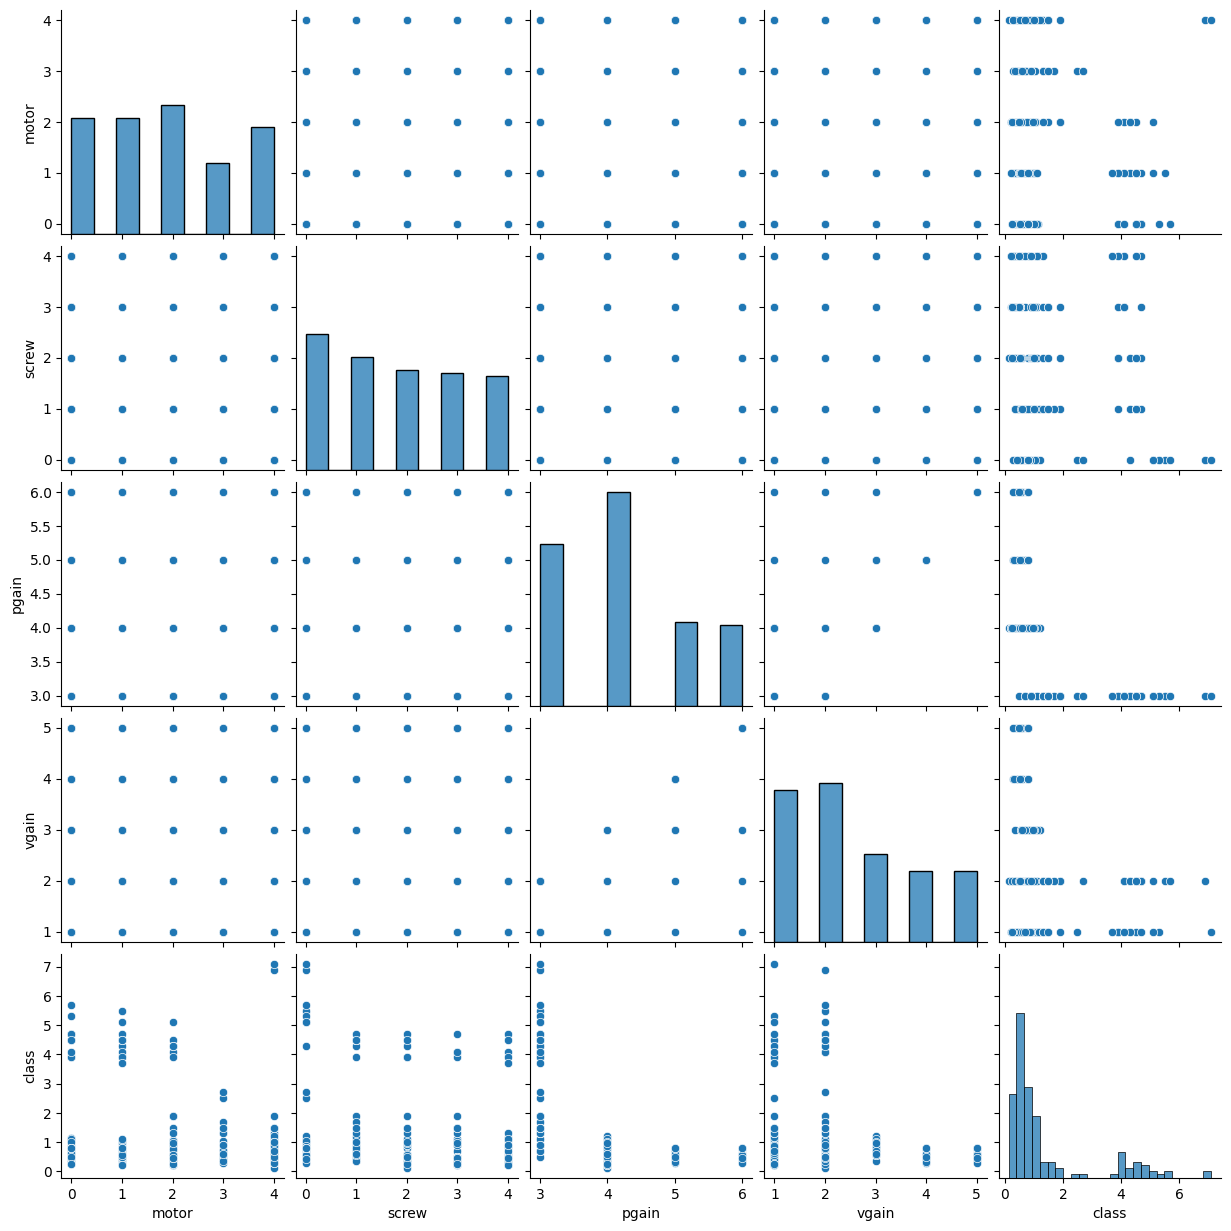

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Assuming you have a DataFrame `df` with your data
sns.pairplot(data1)
plt.show()


### 3D Scatter

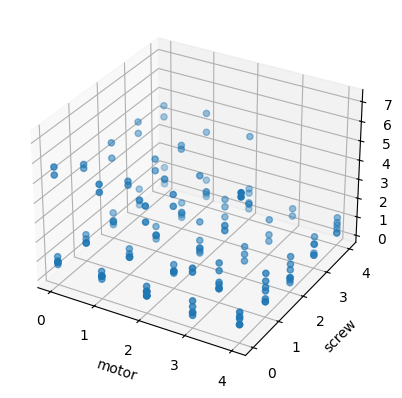

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming `x`, `y`, and `z` are the names of your columns
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data1['motor'], data1['screw'], data1['class'])
ax.set_xlabel('motor')
ax.set_ylabel('screw')
ax.set_zlabel('class')

plt.show()


## Models Implementation

### LinearRegression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data1[['motor', 'screw', 'pgain', 'vgain']]
y = data1['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - R-squared: {r2}")


Linear Regression - Mean Squared Error: 0.9852538110722212
Linear Regression - R-squared: 0.5926992250439138


### Decision Tree Regressor

In [15]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regression
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Decision Tree Regression - Mean Squared Error: {mse}")
print(f"Decision Tree Regression - R-squared: {r2}")


Decision Tree Regression - Mean Squared Error: 0.33299645404341033
Decision Tree Regression - R-squared: 0.8623403307195451


### Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regression - Mean Squared Error: {mse}")
print(f"Random Forest Regression - R-squared: {r2}")


Random Forest Regression - Mean Squared Error: 0.3306108528352968
Random Forest Regression - R-squared: 0.8633265306305542


### Support Vector Regression

In [17]:
from sklearn.svm import SVR

# Support Vector Regression
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Support Vector Regression - Mean Squared Error: {mse}")
print(f"Support Vector Regression - R-squared: {r2}")


Support Vector Regression - Mean Squared Error: 0.3944048744730409
Support Vector Regression - R-squared: 0.8369542860793339


### Multi-layer Perceptron

In [18]:
from sklearn.neural_network import MLPRegressor

# Neural Network Regression
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Neural Network Regression - Mean Squared Error: {mse}")
print(f"Neural Network Regression - R-squared: {r2}")


Neural Network Regression - Mean Squared Error: 0.7017469304098253
Neural Network Regression - R-squared: 0.709900062941218


c:\Users\heman\.conda\envs\notebook\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# Best Model
## Random Forest Regression
### Random Forest Regression - Mean Squared Error: 0.3306108528352968 
### Random Forest Regression - Mean Squared Error: 0.330610852835296



# Explainable AI

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import shap
from lime import lime_tabular
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [24]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regression - Mean Squared Error: {mse}")
print(f"Random Forest Regression - R-squared: {r2}")



Random Forest Regression - Mean Squared Error: 0.3306108528352968
Random Forest Regression - R-squared: 0.8633265306305542


## Featur Ranking

Feature ranking:
1. Feature 2 (0.5656034316617629)
2. Feature 0 (0.22322533944121367)
3. Feature 1 (0.19204057119212228)
4. Feature 3 (0.01913065770490123)


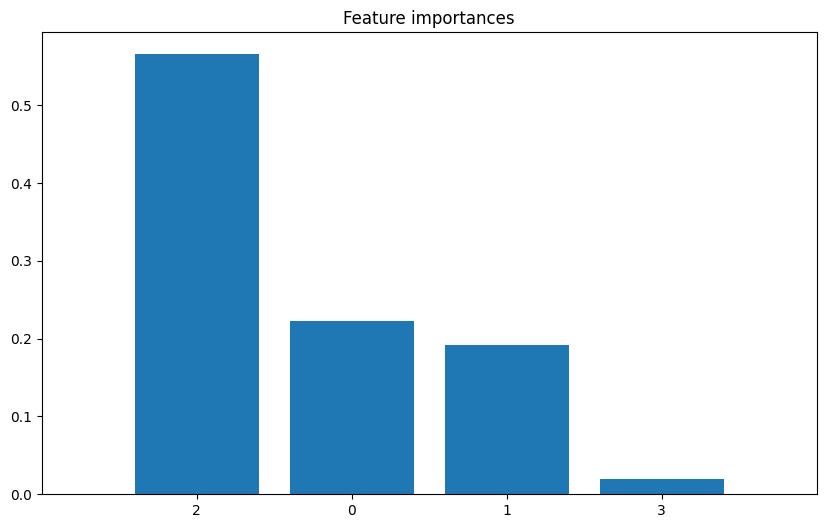

In [25]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()



## SHAP

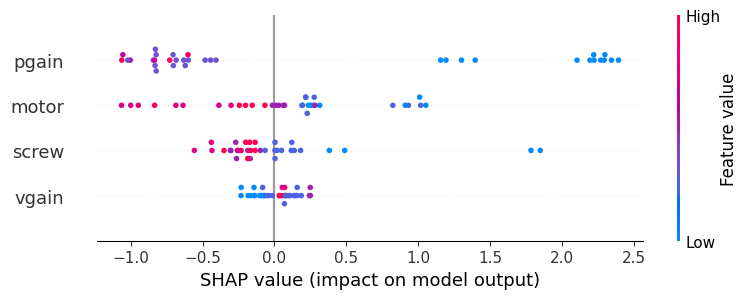

In [26]:

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)



## LIME

In [33]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='regression'
)
exp = explainer.explain_instance(
    data_row=X_test.iloc[0],
    predict_fn=model.predict
)
exp.show_in_notebook()



Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys a